# Classification of handwritten digits using a neural network

## Imports

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score

## Fetch the data set

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml #fetch_openml is used to fetch the data from openml.org
mnist = fetch_openml('mnist_784', version=1, parser='pandas') #parser='pandas' is used to convert the data into pandas dataframe
mnist.keys() #to see the keys of the dataset

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Fetch the datasets from the Dictionary

In [3]:
X, y = mnist["data"], mnist["target"] #X is the feature matrix and y is the target vector
descr = mnist["DESCR"] #DESCR is the description of the dataset
details = mnist["details"] #details is the details of the dataset
url = mnist["url"] #url is the url of the dataset
target_names = mnist["target_names"]
#print
print("X shape: ", X.shape) #gives dimension of the feature matrix
print("y shape: ", y.shape)
print("available at: ", url)
print("target_names: ", target_names)
#print("DESCR: ", descr)
#print("details: ", details)

#print the type of X and y
print("\ntype of X: ", type(X))
print("type of y: ", type(y))

X shape:  (70000, 784)
y shape:  (70000,)
available at:  https://www.openml.org/d/554
target_names:  ['class']

type of X:  <class 'pandas.core.frame.DataFrame'>
type of y:  <class 'pandas.core.series.Series'>


# Get info

In [4]:
from Clean_Data import CleanData
cd = CleanData(X, y)
cd.get_info()

----class run complete----
-------------------------------------------------------------
                    Data Info:
-------------------------------------------------------------
No. of samples: 	 70000
No. of features: 	 784
Feature Names: 		 ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26'] ...truncated
Targets: 		 ['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
Target Value Count: 	 {'1': 7877, '7': 7293, '3': 7141, '2': 6990, '9': 6958, '0': 6903, '6': 6876, '8': 6825, '4': 6824, '5': 6313}
Total Missing values: 	 0
Outliers Detected: 	 (2102602, [10, 116, 216, 254, 216, 9])
Duplicates: 		 0
Whether scaled? 	 None
-------------------------------------------------------------


## Image

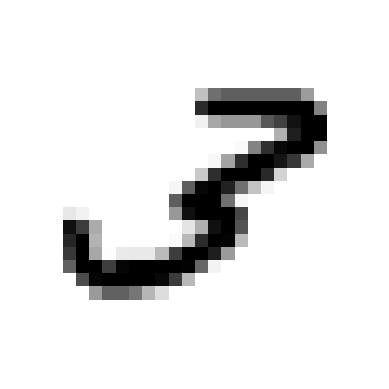

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#plot the image from pixel intensities
some_digit = X.iloc[2423] # get the some row of the feature matrix
some_digit_image = some_digit.values.reshape(28, 28) #reshape the data into 28x28 matrix
plt.imshow(some_digit_image, cmap = mpl.cm.binary) #plot the image using imshow
plt.axis("off") #turn off the axis
plt.show()

## Conversions

In [6]:
#get the target value of the first image
print("Target value: ", y[0])
print(type(y[0]))

Target value:  5
<class 'str'>


We see that label is not a number but a string. Let's convert it to a number since most ML algorithms expect numbers.

In [7]:
# astype is used to convert the data type of the array to the specified data type
y = y.astype(np.uint8) # uint8 is the unsigned integer of 8 bits

# Binary Classification of single digit

## Class BinaryClassMnist

In [8]:
# imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score                

class BinaryClassMinst:

    def __init__(self, X, y):
        self.X = X
        # convert y data types from string to int
        self.y = y.astype(np.uint8)
        #split the data into train and test
        self.X_train, self.X_test, self.y_train, self.y_test = self.X[:60000], self.X[60000:], self.y[:60000], self.y[60000:] 

    def get_bin_test(self, digit = 5):
        y_train_digit = (self.y_train == digit).astype(int)
        y_test_digit = (self.y_test == digit).astype(int)
        return y_train_digit, y_test_digit
    
    def train_predict(self, digit = 5, epochs = 3):

        # get target varibles
        y_train_digit, y_test_digit = self.get_bin_test(digit)

        # build model
        model = Sequential(
            [Dense(units = 25, activation = relu, name = 'l1'),
             Dense(units = 15, activation = relu, name = 'l2'),
             Dense(units = 1, activation = sigmoid, name = 'l3')
            ]
        )

        # complie model with loss and optimizer
        model.compile(loss= BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(0.001)
                      )

        # fit model with train and epochs (steps)
        print("Fitting model...")
        model.fit(self.X_train, y_train_digit, epochs=epochs)

        # get predictions
        print("\nPredicting digit...")
        y_proba_digit = model.predict(self.X_test)
        threshold = 0.5
        y_hat_digit = (y_proba_digit >= threshold).astype(int)
        # get accuracy
        score = accuracy_score(y_test_digit, y_hat_digit ).round(3) * 100
        print("\nAccuracy: ", score, "%")
        
        return score

In [9]:
bcm = BinaryClassMinst(X, y)
bcm.train_predict(digit = 8, epochs=2)

Fitting model...


Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2375
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599

Predicting digit...
313/313 [==============================] - 1s 1ms/step

Accuracy:  98.5 %


98.5

## Separate execution

### Create train and test sets
Since the dataset is already shuffled,      
we can directly split it into a training set (first 60,000 images)        
and a test set (last 10,000 images).

In [10]:
#split the data into train and test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

### Select digit and create dataset

In [11]:
# create test sets for binary classification of digit 7
# set 0 for non-7 digits and 1 for digit 7 in test set
y_train_7 = (y_train == 7).astype(int)
y_test_7 = (y_test == 7).astype(int)

In [12]:
cd = CleanData(X_train, y_train_7)
cd.get_info()

-------------------------------------------------------------
                    Data Info:
-------------------------------------------------------------
No. of samples: 	 60000
No. of features: 	 784
Feature Names: 		 ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26'] ...truncated
Targets: 		 [0 1]
Target Value Count: 	 {0: 53735, 1: 6265}
Total Missing values: 	 0
Outliers Detected: 	 (1815839, [10, 116, 216, 254, 216, 9])
Duplicates: 		 0
Whether scaled? 	 None
-------------------------------------------------------------


### Model Building

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.activations import relu

# build sequential model with 3 layers
'''
Dense: Just your regular densely-connected NN layer.
Sequential: Sequential groups a linear stack of layers into a tf.keras.Model.
sigmoid: Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
relu: With default values, this returns the standard ReLU activation: max(x, 0), 
the element-wise maximum of 0 and the input tensor.
'''

model = Sequential(
    [
        Dense(units = 25, activation = relu, name = 'l1'),
        Dense(units = 15, activation = relu, name = 'l2'),
        Dense(units = 1, activation = sigmoid, name = 'l3'),
    ]
)

# get the layers
[layer1, layer2, layer3] = model.layers

# compile the model using losses and optimizers
from tensorflow.keras.losses import BinaryCrossentropy
# BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

# fit the model on training data and labels
model.fit(
    X_train, y_train_7,
    epochs=5 # number of iterations
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1816
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0426
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0335
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0250


### Predictions

In [14]:
# weight and bias of the first layer:
W1, b1 = layer1.get_weights()
print(f"Shape of weights: {W1.shape}, Shape of bias: {b1.shape}")

Shape of weights: (784, 25), Shape of bias: (25,)


In [15]:
#predict the first number of the train set
y_hat_7 = model.predict(X_train)
threshold = 0.5
binary_predictions = (y_hat_7 >= threshold).astype(int)

1875/1875 [==============================] - 4s 2ms/step


In [16]:
# random index prediction
print("Predicted value: ", binary_predictions[38])
print("Actual value: ", y_train_7[38])
# indices of all 7s in predictions and actual
print(np.where(binary_predictions == 1))
print(np.where(y_train_7 == 1))
# accuracy
from sklearn.metrics import accuracy_score
print("\nAccuracy: ", accuracy_score(y_train_7, binary_predictions ).round(3) * 100, "%")

Predicted value:  [1]
Actual value:  1
(array([   15,    29,    38, ..., 59963, 59977, 59988], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
(array([   15,    29,    38, ..., 59963, 59977, 59988], dtype=int64),)

Accuracy:  99.4 %


# Working of activation functions

## Sigmoid Activation Function:
```sigmoid(x) = 1 / (1 + exp(-x))```        
Applies the sigmoid activation function. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

Sigmoid is equivalent to a 2-element Softmax, where the second element is assumed to be zero. The sigmoid function always returns a value between 0 and 1.

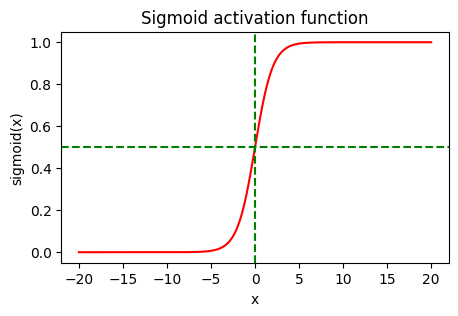

In [17]:
from tensorflow.keras.activations import sigmoid
x = tf.linspace(-20,20,1000)
#x = tf.constant([-100,-60, -40, -20, -1.0, 0.0, 1.0, 30, 40, 60, 100], dtype=float)
g_x = sigmoid(x)
#print(g_x)
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5,3))
plt.plot(x,g_x, color = 'r')
plt.axhline(y=0.5, color='g', linestyle='--', label='Horizontal Line')
plt.axvline(x=0, color='g', linestyle='--', label='Vertical Line')
plt.title("Sigmoid activation function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

## ReLU Activation Function
Applies the rectified linear unit activation function. 
With default values, this returns the standard ReLU activation:          
```max(x, 0)```
the element-wise maximum of 0 and the input tensor.

[ 0.  0.  0.  5. 10.]


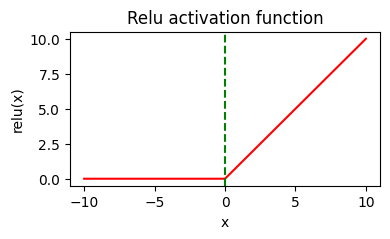

In [18]:
from tensorflow.keras.activations import relu
x = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
relu_x = relu(x).numpy()
print(relu_x)
plt.figure(figsize=(4,2))
plt.plot(x,relu_x, color = 'r')
plt.axvline(x=0, color='g', linestyle='--', label='Vertical Line')
plt.title("Relu activation function")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.show()


## Linear Activation Functions:
returns input unmodified.

[-3. -1.  0.  1.  3.]


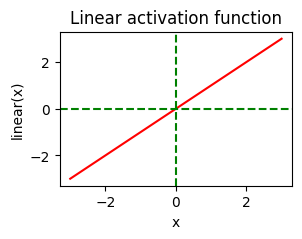

In [19]:
from tensorflow.keras.activations import linear
x = tf.constant([-3.0,-1.0, 0.0,1.0,3.0], dtype = tf.float32)
linear_x = linear(x).numpy()
print(linear_x)
plt.figure(figsize=(3,2))
plt.plot(x,linear_x, color = 'r')
plt.axvline(x=0, color='g', linestyle='--', label='Vertical Line')
plt.axhline(y=0, color='g', linestyle='--', label='Horizontal Line')
plt.title("Linear activation function")
plt.xlabel("x")
plt.ylabel("linear(x)")
plt.show()

# Multiclass classification with neural networks

## Imports and Preprocessing

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
# along with a test set of 10,000 images.
# x_train is a numpy array of 28 rows. Each row consists of 28 values.
# so, there are 28x28 = 784 values representing intensities of 784 pixels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be in the range [0, 1]
# Neural Networks work better for small range values.
# 255 is the highest pixel intensity value.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
# to_categorical function from utils will convert the target variable to
# binary variables consisting of all 0s except for the class label for each row.
# Here, 10 the no.of classes.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


784


## Build Model

1. **Sequential Model:**
It is a *plain stack of layers* where each layer takes exactly 1 input tensor(array) and outputs exactly 1 tensor. Here, the tensors outputed are also called "*Activation Functions*"(a bar).

2. **Flatten Layer:**
This is a layer to flatten the values 28x28 *2D matrix* into 784 values of *1D array*.
Flattening the matrix helps feeding it to the subsequent layers.

3. **Dense Layers:**
Dense layer is the *fully connected layer* of neural network units. The number given (eg. 128, 64 and 10) are the no. of units presents in respective layers. 
    - The *first 2 layers* have activation function *'ReLU'* which stands for Rectified Linear Unit. This activation induces *non-linearity* in the model which indeed helps the model to learn. 
    - The *third layers* is fed with activation function *'softmax'* which converts the final layer's output to *probabilities*, making it suitable for multi class classification.         
    
4. **Compile the model:**
We configure the model with *optimizer 'adam'* (for minimizing the cost) and *loss function 'categorical_crossentropy'* (the cost function J). We also specify that we want to track the accuracy of the model further.

5. **Train the model:**
The fit() is used to train the model with the train set with the *batch size* of 128. *Epochs* are the no of iterations or steps to carry out. *Validation split* - Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

6. **Evaluate the model:**
Evalutes the model on the test set and returns the *loss* and the *accuracy* score.

In [21]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D array
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Train and Test

In [23]:
# Train the model
batch_size = 128
epochs = 3
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3


422/422 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.9016 - val_loss: 0.1452 - val_accuracy: 0.9617
Epoch 2/3
422/422 [==============================] - 2s 4ms/step - loss: 0.1419 - accuracy: 0.9586 - val_loss: 0.1070 - val_accuracy: 0.9695
Epoch 3/3
422/422 [==============================] - 2s 4ms/step - loss: 0.1011 - accuracy: 0.9699 - val_loss: 0.0925 - val_accuracy: 0.9750


In [24]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest loss:", loss)
print("Test accuracy: %.2f%%" % (accuracy * 100))

79/79 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9698

Test loss: 0.09553337842226028
Test accuracy: 96.98%
